## Problem Statement ##
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Goals and Objectives ##

- Data inspection and EDA.
- Outlier Analysis.
- K-means and Hierarchical clustering.
- Analyse the clusters and identify the ones which are in dire need of aid.
- Visualisations on the clusters that have been formed.
- Report back at least 5 countries which are in direst need of aid from the analysis.


In [182]:
# Import the necessary libraries

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data scaling
from sklearn.preprocessing import StandardScaler

# KMeans clustering 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Display all rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 

### Step 1 - Reading and inspecting the data

In [183]:
#reading the file
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [184]:
country_df.shape

(167, 10)

In [185]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [186]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2 - Data Cleaning

In [187]:
# Checking for Duplicates
country_df.duplicated(subset = ['country'], keep = False).sum()

0

There are no duplicates present in the data

In [188]:
# Checking the percentage of missing values
round(100*(country_df.isnull().sum()/len(country_df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no missing values in the data

In [189]:
# Checking for Duplicates

country_df.loc[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


The dataset seems to be clean, hence no cleansing activities are required.

### Step 3 - Exploratory Data Analysis

To choose the countries that are in the direst need of aid we need to check some socio-economic and health factors that determine the overall development of the country.

We will analyse the lowest 10 countries for each factor.

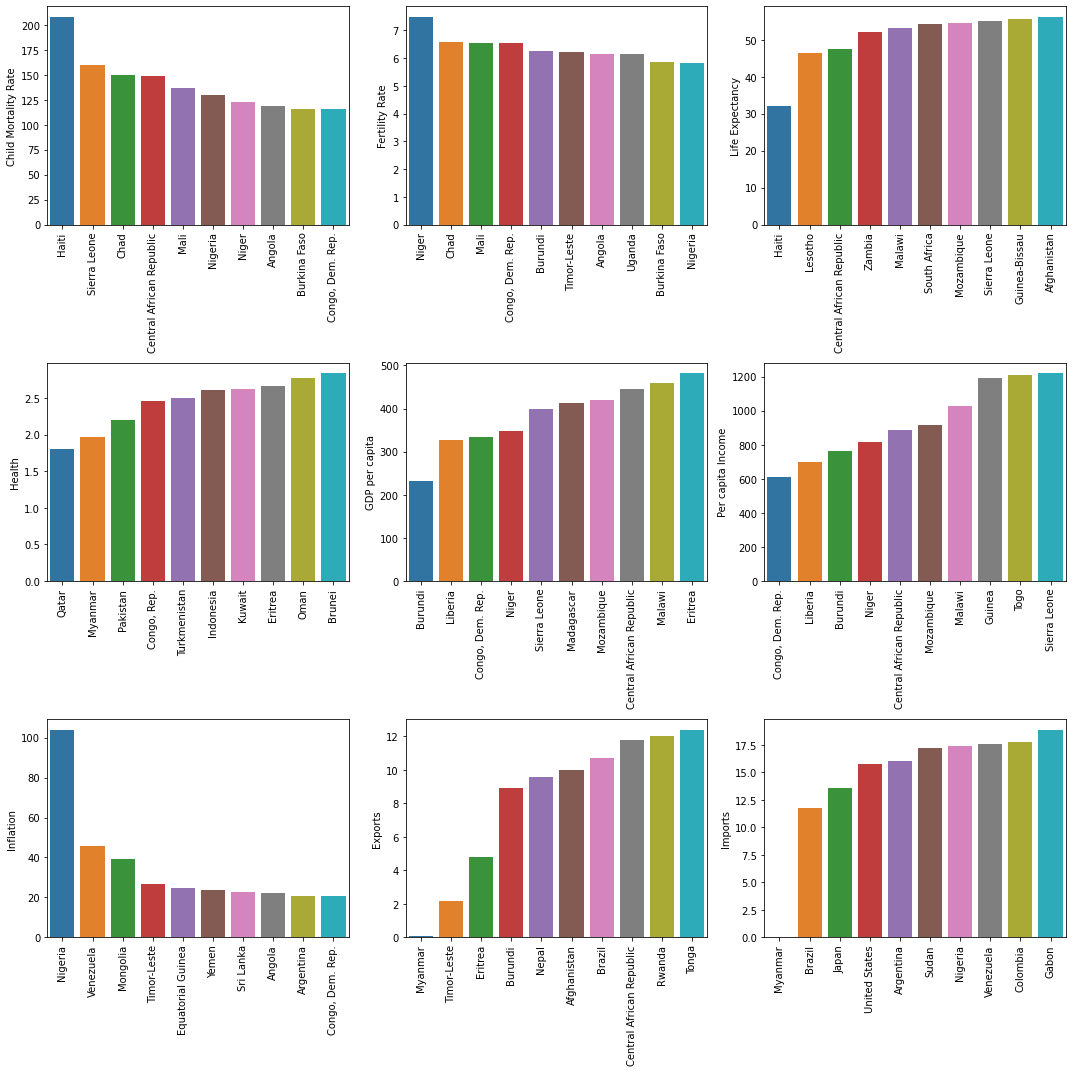

In [190]:
# Creating bar plots as subplots for the various factors

fig, axs = plt.subplots(3,3,figsize = (15,15))

# Taking the lowest 10 contries for each factor
child_mort_high = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
total_fer_high = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
life_expec_low = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
health_low = country_df[['country','health']].sort_values('health', ascending = True).head(10)
gdpp_low = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
income_low = country_df[['country','income']].sort_values('income', ascending = True).head(10)
inflation_low = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
exports_low = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
imports_low = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)

# Drawing the bar plots for each feature
def myplotfunc(Y,Y_label,d,a):
    plt1 = sns.barplot(x='country', y=Y, data=d, ax = a)
    plt1.set(xlabel = '', ylabel= Y_label)
    
myplotfunc('child_mort','Child Mortality Rate',child_mort_high,axs[0,0])
myplotfunc('total_fer','Fertility Rate',total_fer_high,axs[0,1])
myplotfunc('life_expec','Life Expectancy',life_expec_low,axs[0,2])
myplotfunc('health','Health',health_low,axs[1,0])
myplotfunc('gdpp','GDP per capita',gdpp_low,axs[1,1])
myplotfunc('income','Per capita Income',income_low,axs[1,2])
myplotfunc('inflation','Inflation',inflation_low,axs[2,0])
myplotfunc('exports','Exports',exports_low,axs[2,1])
myplotfunc('imports','Imports',imports_low,axs[2,2])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()
    

<Figure size 288x288 with 0 Axes>

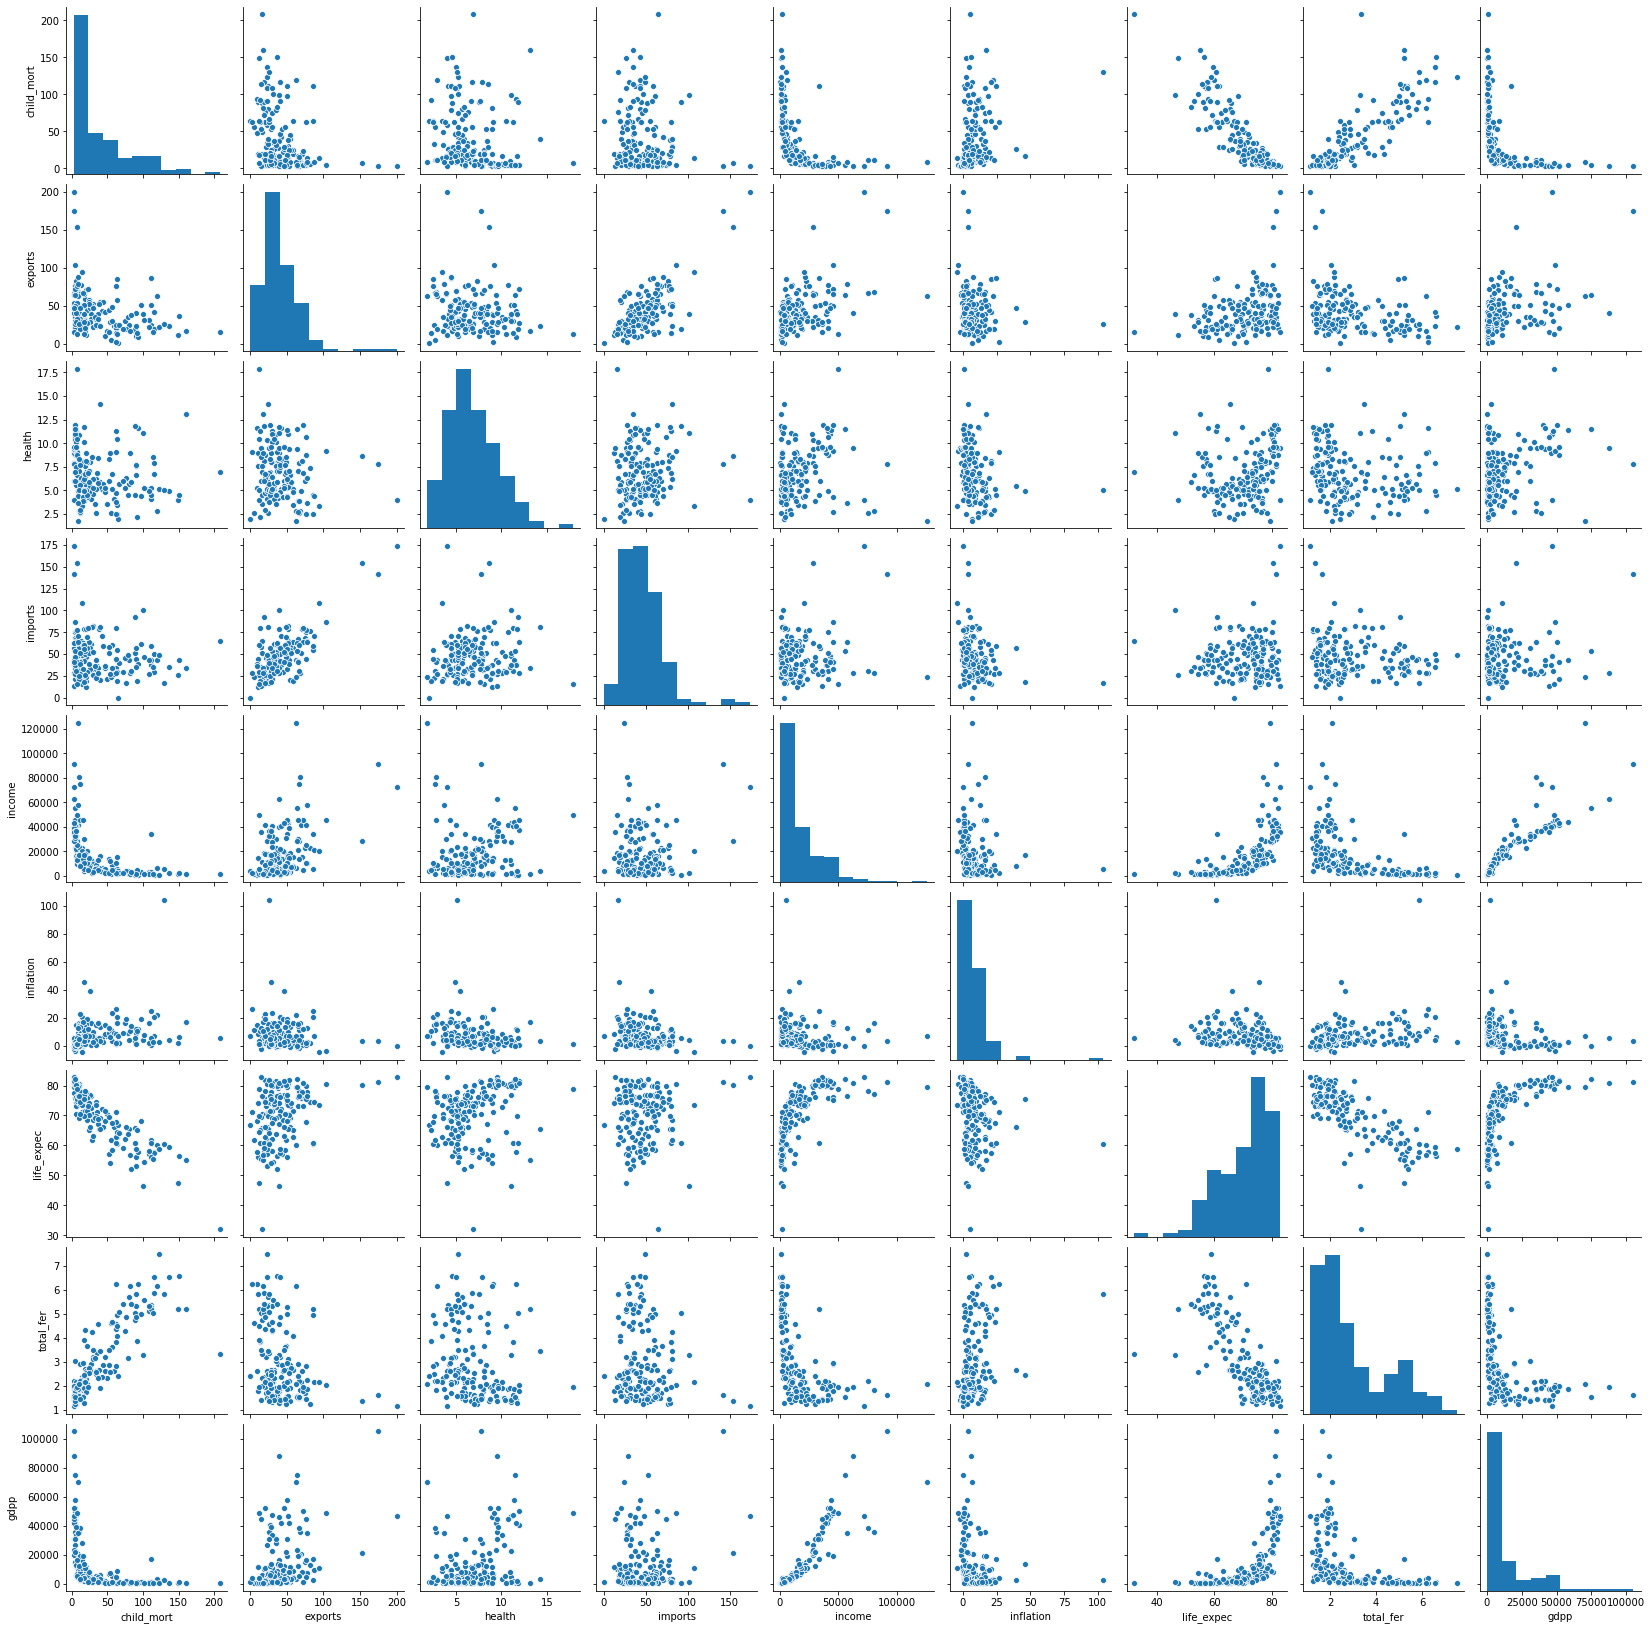

In [191]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

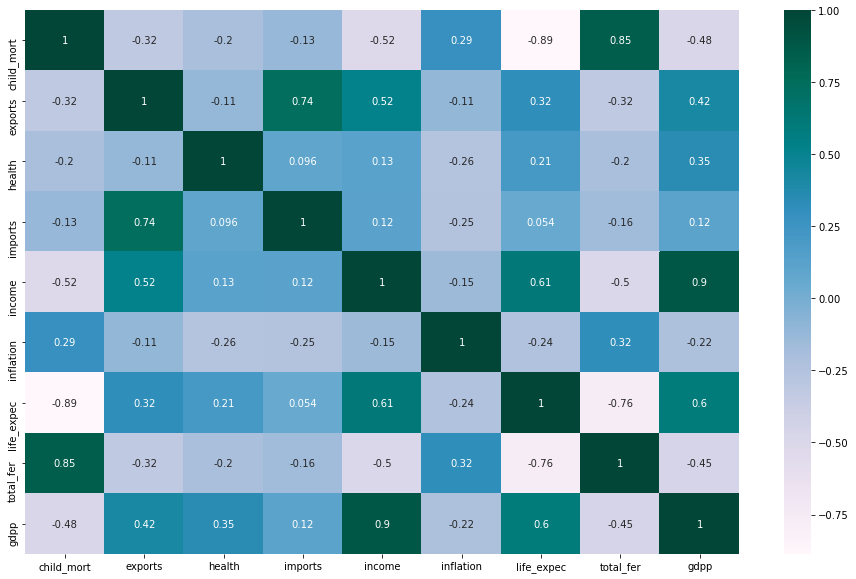

In [192]:
# Checking the correlation between the variables using a heatmap

plt.figure(figsize = (16, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="PuBuGn")

plt.show()

<b> We notice that there is high correlation between quite a few variables like total_fer and child_mort, income and gdpp etc.</b>

### Step 4 - Outlier Analysis

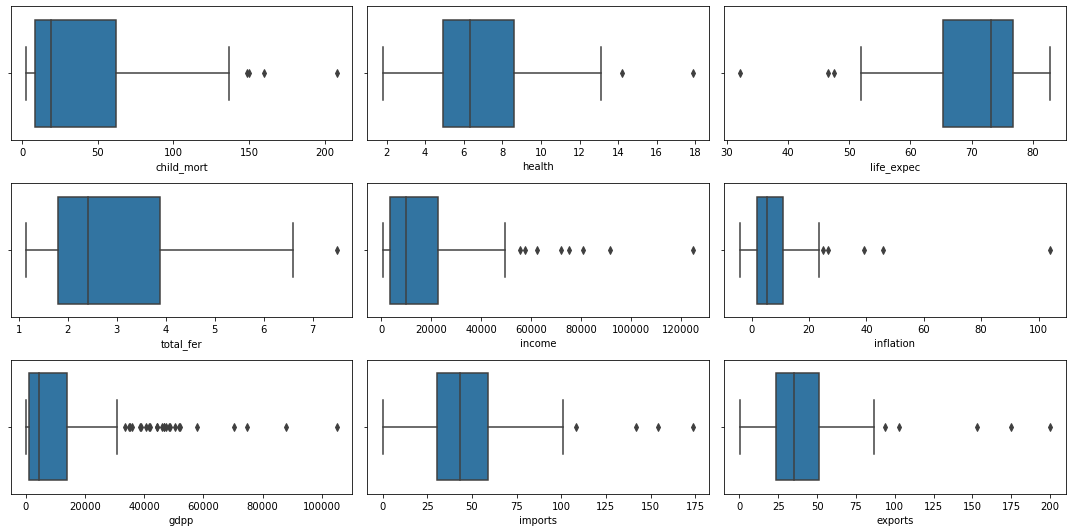

In [193]:
# Checking the outlier values for each of the columns

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])

plt.tight_layout()

In [194]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<b>We notice that there are quite a few outliers in the data and both k-means and Hierarchical clustering algorithms are sensitive to outliers, hence we will handle these outliers by capping them.</b>

In [195]:
# Creating a copy of the original dataframe.
country_df_new = country_df.copy()

In [196]:
# Creating a re-usable function to cap the data using quantiles
def myCapfunc(x):
    percentiles = country_df_new[x].quantile([0.05,0.95]).values
    country_df_new[x][country_df_new[x] <= percentiles[0]] = percentiles[0]
    country_df_new[x][country_df_new[x] >= percentiles[1]] = percentiles[1]

myCapfunc('child_mort')
myCapfunc('health')
myCapfunc('life_expec')
myCapfunc('total_fer')
myCapfunc('income')
myCapfunc('inflation')
myCapfunc('gdpp')
myCapfunc('imports')
myCapfunc('exports')

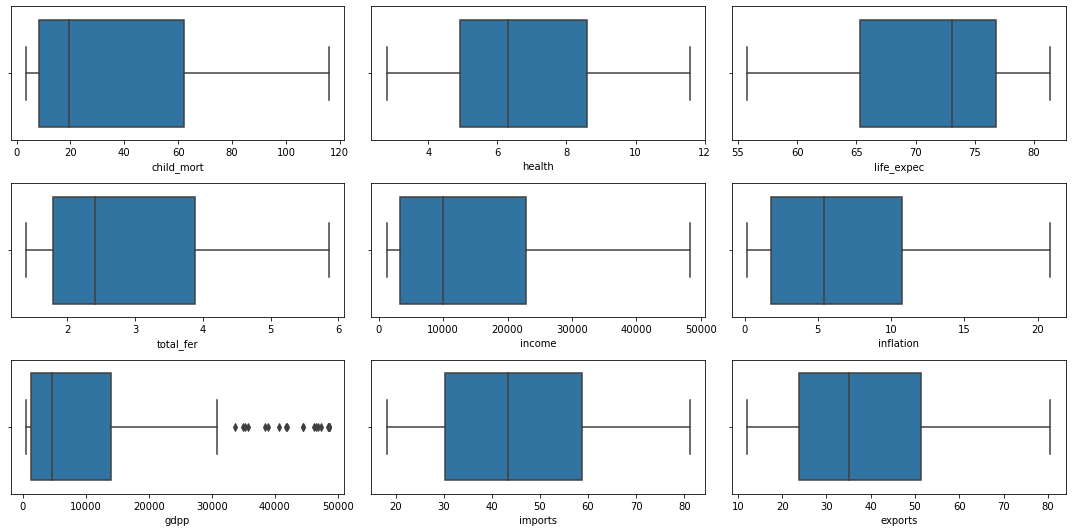

In [197]:
# Checking the presence of outliers after handing them

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df_new['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df_new['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df_new['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df_new['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df_new['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df_new['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df_new['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df_new['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df_new['exports'], ax = axs[2,2])

plt.tight_layout()

<b>We now see that the outiers have been handled.</b>

### Step 5 - Data Scaling

In [198]:
# Create a scaling object
scaler = StandardScaler()

# Create a list of the numerical variables that needs to be scaled
numlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Scale these variables using 'fit_transform'
country_df_scaled = scaler.fit_transform(country_df_new[numlist])

In [199]:
country_df_scaled = pd.DataFrame(country_df_scaled, columns = numlist)
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


**Hopkins Statistics**

In [200]:
#Calculating the Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [201]:
hopkins(country_df_scaled)

0.7417710117233253

### Step 6 - Model Building

- ### K-Means Clustering

The algorithm works as follows:
First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [202]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 100)
kmeans.fit(country_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [203]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3,
       1, 3, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 0, 3, 2, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 3, 3, 0, 0, 3, 2, 2, 0, 0, 1, 3, 0, 1, 3, 3,
       1, 2, 3, 2, 3, 1, 2, 2, 0, 3, 1, 3, 2, 2, 1, 1, 3, 1, 1, 3, 3, 0,
       3, 1, 3, 2, 2, 2, 0, 0, 3, 0, 3, 1, 1])

#### Finding the optimum number of clusters

<b>Elbow Curve:</b>
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

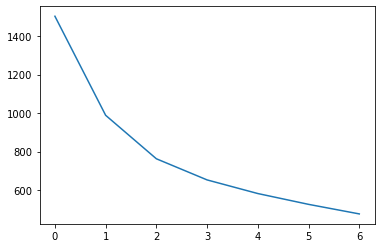

In [204]:
# elbow-curve/SSD
ssd = []

for num_clusters in list(range(1,8)):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state = 100)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

##### Inference 
Looking at the elbow curve we can take clusters as 4 or 5

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [205]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state = 100)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2898029800333512
For n_clusters=3, the silhouette score is 0.2744467287099131
For n_clusters=4, the silhouette score is 0.25322751119271014
For n_clusters=5, the silhouette score is 0.25186712476482714
For n_clusters=6, the silhouette score is 0.24326288465713963
For n_clusters=7, the silhouette score is 0.2594246805050468
For n_clusters=8, the silhouette score is 0.2568998529420105


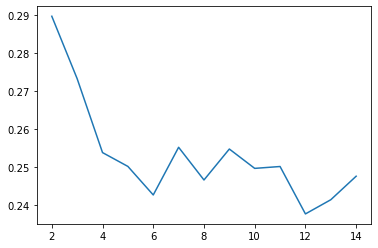

In [206]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_df_scaled)
    sse_.append([k, silhouette_score(country_df_scaled, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Based on the Elbow curve and silhouette analysis we can conclude that K=3 will be the appropriate number of clusters to go with.

### Kmeans with K= 3

In [207]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 100)
kmeans.fit(country_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [208]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [209]:
# assign the label to the main dataset
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


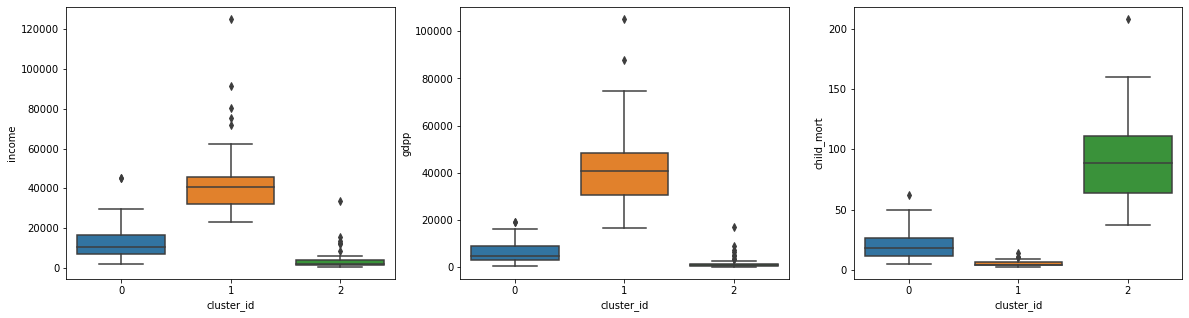

In [210]:
# Boxplot between cluster Id and income, gdpp and child_mort respectively

fig, axs = plt.subplots(1, 3,figsize = (20,5))
plt1 = sns.boxplot(x='cluster_id', y='income', data=country_df, ax = axs[0])
plt2 = sns.boxplot(x='cluster_id', y='gdpp', data=country_df, ax = axs[1])
plt3 = sns.boxplot(x='cluster_id', y='child_mort',data=country_df, ax = axs[2])

plt.show()

In [211]:
country_df['cluster_id'].value_counts()

0    80
2    50
1    37
Name: cluster_id, dtype: int64

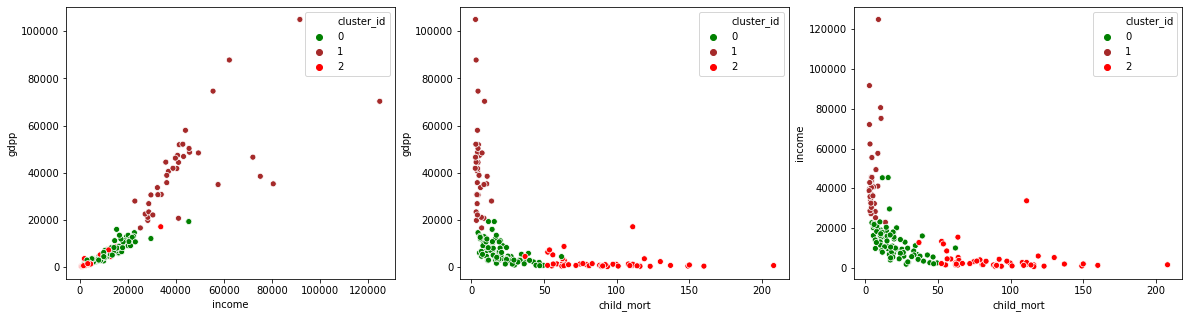

In [212]:
# scatterplot between cluster Id and income, gdpp and child_mort respectively

fig, axs = plt.subplots(1, 3,figsize = (20,5))
plt1 = sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=country_df,palette=['green','brown','red'],ax = axs[0])
plt2 = sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=country_df,palette=['green','brown','red'],ax = axs[1])
plt3 = sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=country_df,palette=['green','brown','red'],ax = axs[2])

plt.show()

### K-Means Cluster Analysis 

In [213]:
#let's take mean of all the columns and analyze them clusterwise

child_mort_mean = pd.DataFrame(country_df.groupby(["cluster_id"]).child_mort.mean())
exports_mean    = pd.DataFrame(country_df.groupby(["cluster_id"]).exports.mean())
health_mean     = pd.DataFrame(country_df.groupby(["cluster_id"]).health.mean())
imports_mean    = pd.DataFrame(country_df.groupby(["cluster_id"]).imports.mean())
income_mean     = pd.DataFrame(country_df.groupby(["cluster_id"]).income.mean())
inflat_mean     = pd.DataFrame(country_df.groupby(["cluster_id"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_df.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean  = pd.DataFrame(country_df.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean       = pd.DataFrame(country_df.groupby(["cluster_id"]).gdpp.mean())

In [214]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

cluster_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
cluster_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,20.656250,41.348500,6.262375,48.228750,12506.625000,7.629362,73.000000,2.293125,6422.325000
1,1,5.237838,58.097297,8.782973,51.281081,45056.756757,2.588432,79.956757,1.755676,42102.702703
2,2,90.896000,28.154380,6.245200,41.499318,3910.660000,11.868900,59.688000,4.878000,1868.560000


<b>Plotting these cluster means to get a detailed view:</b>

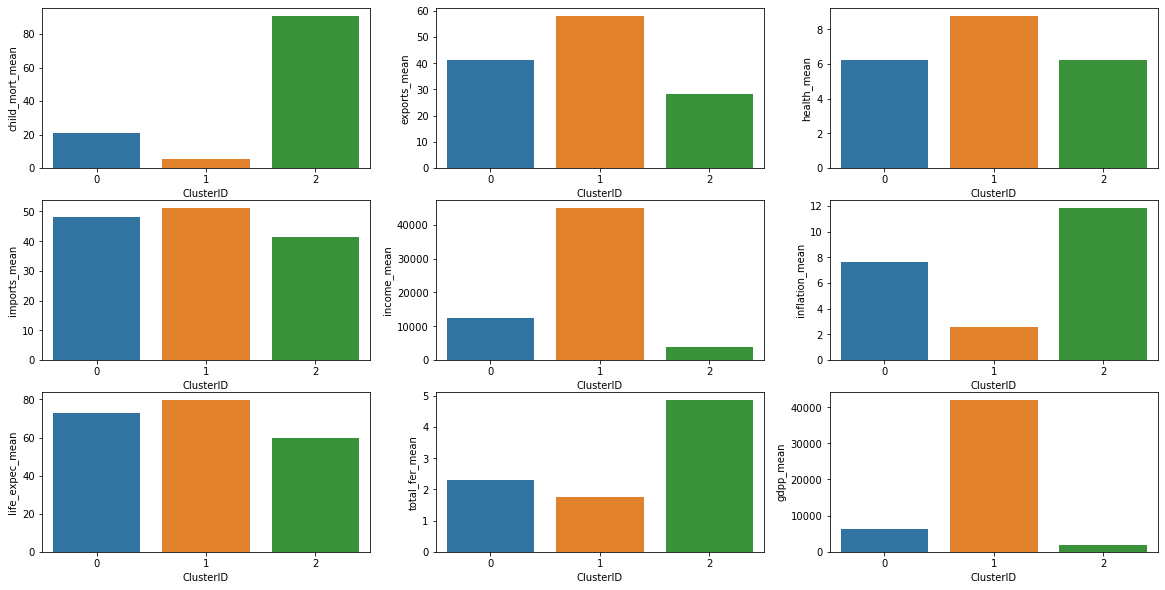

In [215]:
fig, axs = plt.subplots(3,3, figsize = (20,10))

plt1 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.child_mort_mean, ax = axs[0,0])
plt2 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.exports_mean, ax = axs[0,1])
plt3 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.health_mean, ax = axs[0,2])
plt4 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.imports_mean, ax = axs[1,0])
plt5 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.income_mean, ax = axs[1,1])
plt6 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.inflation_mean, ax = axs[1,2])
plt7 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.life_expec_mean, ax = axs[2,0])
plt8 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.total_fer_mean, ax = axs[2,1])
plt9 = sns.barplot(cluster_analysis_df.ClusterID, cluster_analysis_df.gdpp_mean, ax = axs[2,2])

**Looking at the graphs we can see that cluster 2 is our cluster of concern. Because:**

- It has highest child mortality
- Lowest income
- Highest Inflation
- Compartively low life expectancy 
- Highest total fertility 
- Lowest gdpp.

In [216]:
#Let us bin our cluster 2
cluster_km=country_df[country_df['cluster_id']==2]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2


**As per K- means clustering, the country which are direst need of aid are:**

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10.Eritrea

- ### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering: 
- Divisive
- Agglomerative.

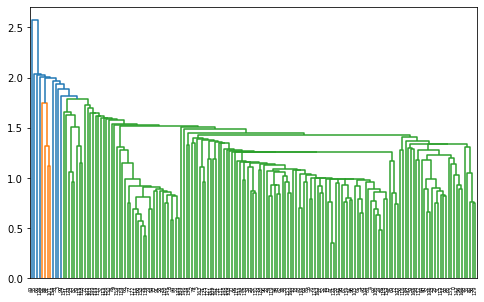

In [217]:
# Single linkage
fig = plt.figure(figsize = (8,5))
mergings = linkage(country_df_scaled, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

We notice that single linkage visualization does seem to be clear enough.

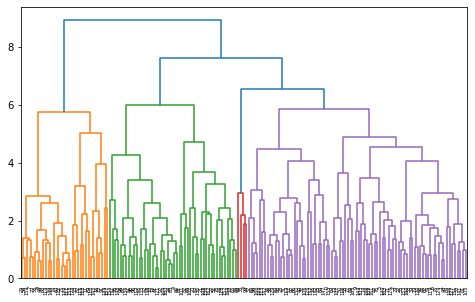

In [218]:
# complete linkage
fig = plt.figure(figsize = (8,5))
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Let's cut the dendogram at n = 3.**

In [219]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0])

In [220]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [221]:
country_df['cluster_labels'].value_counts()

0    86
1    48
2    33
Name: cluster_labels, dtype: int64

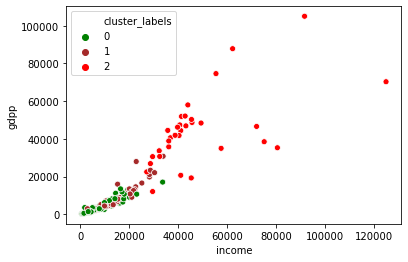

In [222]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',legend='full',data=country_df,palette=['green','brown','red'])
plt.show()

### Hierarchical Cluster Analysis 

In [223]:
#let's take mean of all the columns and analyze them clusterwise

child_mort_mean_hc = pd.DataFrame(country_df.groupby(["cluster_labels"]).child_mort.mean())
exports_mean_hc    = pd.DataFrame(country_df.groupby(["cluster_labels"]).exports.mean())
health_mean_hc     = pd.DataFrame(country_df.groupby(["cluster_labels"]).health.mean())
imports_mean_hc    = pd.DataFrame(country_df.groupby(["cluster_labels"]).imports.mean())
income_mean_hc     = pd.DataFrame(country_df.groupby(["cluster_labels"]).income.mean())
inflat_mean_hc     = pd.DataFrame(country_df.groupby(["cluster_labels"]).inflation.mean())
life_expec_mean_hc = pd.DataFrame(country_df.groupby(["cluster_labels"]).life_expec.mean())
total_fer_mean_hc  = pd.DataFrame(country_df.groupby(["cluster_labels"]).total_fer.mean())
gdpp_mean_hc       = pd.DataFrame(country_df.groupby(["cluster_labels"]).gdpp.mean())

In [224]:
cluster_analysis_df_hc = pd.concat([pd.Series([0,1,2]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

cluster_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
cluster_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,59.519767,28.489523,5.828721,36.491464,7199.686047,11.644605,66.186047,3.746860,3584.081395
1,1,22.427083,53.725000,7.428333,66.327083,13631.041667,3.375688,71.910417,2.233958,8543.395833
2,2,5.936364,55.645455,8.496667,45.718182,48172.727273,4.124152,79.972727,1.904545,43839.393939


**Plotting these cluster means to get a detailed view:**

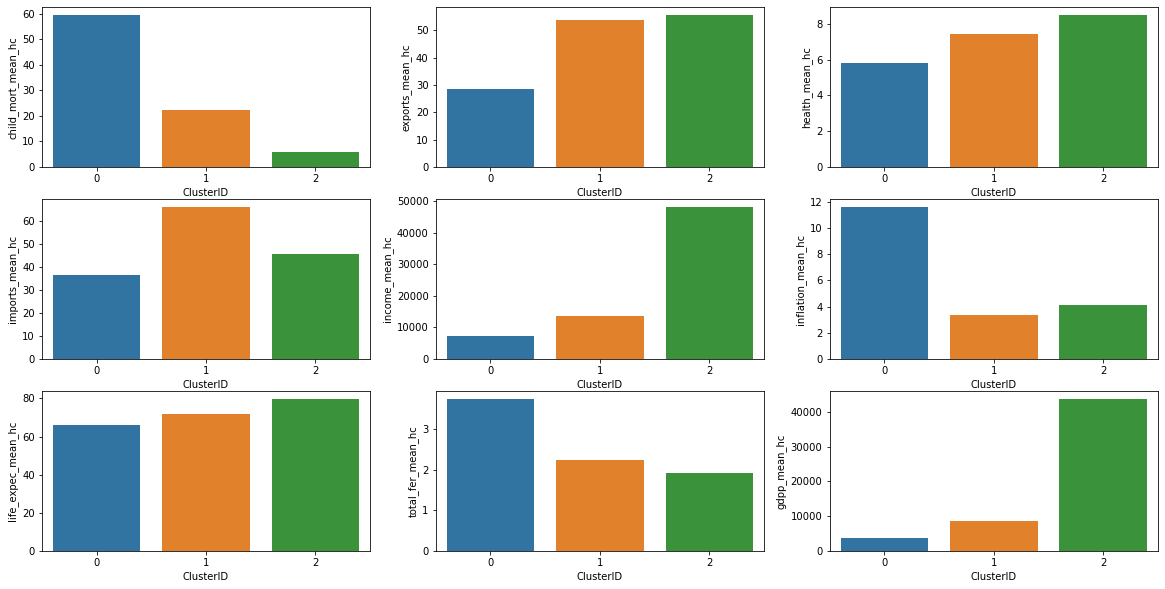

In [225]:
fig, axs = plt.subplots(3,3, figsize = (20,10))

plt1 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.child_mort_mean_hc, ax = axs[0,0])
plt2 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.exports_mean_hc, ax = axs[0,1])
plt3 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.health_mean_hc, ax = axs[0,2])
plt4 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.imports_mean_hc, ax = axs[1,0])
plt5 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.income_mean_hc, ax = axs[1,1])
plt6 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.inflation_mean_hc, ax = axs[1,2])
plt7 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.life_expec_mean_hc, ax = axs[2,0])
plt8 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.total_fer_mean_hc, ax = axs[2,1])
plt9 = sns.barplot(cluster_analysis_df_hc.ClusterID, cluster_analysis_df_hc.gdpp_mean_hc, ax = axs[2,2])

**Looking at the graph we are certain that cluster 0 is our cluster of concern. Because:**

- It has highest child mortality
- Lowest income
- Highest Inflation
- Compartively low life expectancy
- Highest total fertility
- Lowest gdpp.

In [226]:
#Let us bin our cluster 0
cluster_hc=country_df[country_df['cluster_labels']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,2,0


**As per Heirarchical Clustering, the countries which require aid are:**

1. Burundi
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Madagascar
6. Mozambique
7. Central African Republic
8. Malawi
9. Eritrea
10.Togo

### Step 7 - Final conclusion

The final countries are:

1. Burundi
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Madagascar
6. Mozambique
7. Central African Republic
8. Malawi
9. Eritrea